# Come trovare il CCP migliore per un modello di classificazione?

Il **CCP (Cost Complexity Pruning)** è una tecnica di potatura degli alberi decisionali utilizzata per migliorare la generalizzazione e prevenire l'overfitting. Questa tecnica è nota anche come **potatura dei costi di complessità** e viene applicata agli alberi decisionali per ridurre la loro complessità e migliorare le loro performance sui dati di test.

### Come Funziona il CCP:

1. **Definizione del Problema**: Gli alberi decisionali possono diventare molto complessi e dettagliati, adattandosi eccessivamente ai dati di addestramento. Questo porta a un problema di overfitting, dove il modello si adatta troppo bene ai dati di addestramento ma ha una bassa capacità di generalizzazione.
2. **Cost Complexity Measure**: Il CCP introduce un parametro di complessità del costo che bilancia l'accuratezza dell'albero e la sua complessità. La funzione obiettivo è data da:Rα(T)=R(T)+α⋅∣T∣
    
    Rα(T)=R(T)+α⋅∣T∣R_\alpha(T) = R(T) + \alpha \cdot |T|
    
    dove:
    
    - R(T)R(T)R(T) è l'errore di classificazione o la misura di costo dell'albero T.
        
        TT
        
    - ∣T∣|T|∣T∣ è il numero di foglie dell'albero T.
        
        TT
        
    - α\alphaα è il parametro di complessità che penalizza la complessità dell'albero.
3. **Potatura Iterativa**: Il processo di potatura iterativa riduce la complessità dell'albero rimuovendo i rami meno significativi. Viene creata una serie di alberi, ognuno dei quali è una versione potata dell'albero originale. Questi alberi sono ottenuti aumentando il valore di α\alphaα, che penalizza la complessità.
4. **Scelta dell'Albero Ottimale**: Dopo aver generato una serie di alberi potati, si utilizza una tecnica di validazione (come la cross-validation) per selezionare l'albero con il miglior compromesso tra accuratezza e complessità. L'albero ottimale è quello che offre la migliore prestazione sui dati di validazione.

### Implementazione con Scikit-Learn:

In `scikit-learn`, il CCP può essere implementato utilizzando il metodo `DecisionTreeClassifier` o `DecisionTreeRegressor` e il parametro `ccp_alpha`. Ecco un esempio:

Il miglior valore di ccp_alpha è: 0.00000
Accuratezza con il miglior ccp_alpha: 1.0000


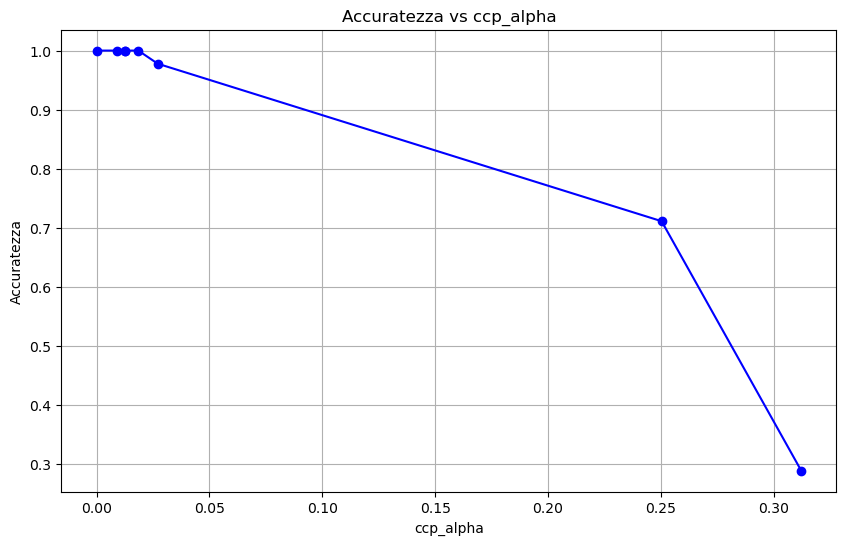

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carica il dataset Iris
data = load_iris()
X = data.data
y = data.target

# Suddividi i dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea un classificatore Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Allena il modello senza potatura
tree.fit(X_train, y_train)

# Trova i valori di ccp_alpha migliori utilizzando la potatura
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista per memorizzare le accuratezze
accuracies = []

# Allena e valuta gli alberi potati per diversi valori di ccp_alpha
for alpha in ccp_alphas:
    tree_pruned = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    tree_pruned.fit(X_train, y_train)
    y_pred_pruned = tree_pruned.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_pruned))

# Trova l'indice del miglior valore di alpha
best_alpha_index = np.argmax(accuracies)
best_alpha = ccp_alphas[best_alpha_index]
best_accuracy = accuracies[best_alpha_index]

# Mostra i risultati
print(f"Il miglior valore di ccp_alpha è: {best_alpha:.5f}")
print(f"Accuratezza con il miglior ccp_alpha: {best_accuracy:.4f}")

# Grafico dell'accuratezza in funzione di ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracies, marker='o', color='blue')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuratezza')
plt.title('Accuratezza vs ccp_alpha')
plt.grid(True)
plt.show()

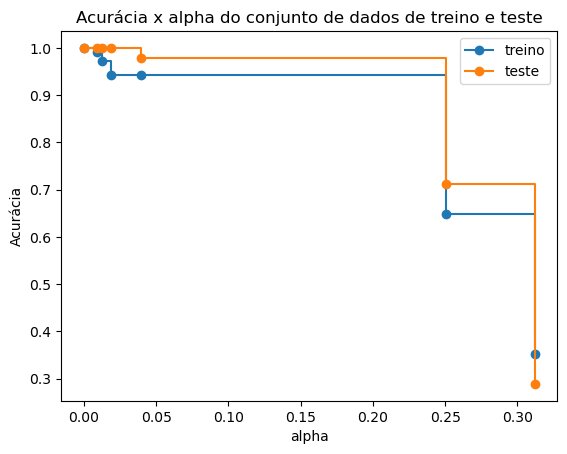

In [2]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [3]:
import pandas as pd
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,1.000000
1,0.009235,1.000000
2,0.012698,1.000000
3,0.018503,1.000000
4,0.039723,0.977778
5,0.250287,0.711111
6,0.312109,0.288889


In [4]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.022588)

clf_podada.fit(X_train, y_train)
predict = clf_podada.predict(X_test)
print(accuracy_score(y_test, predict))

pred = clf_podada.predict(X_test)
print(accuracy_score(y_test, pred))

1.0
1.0


Trovare il Cutoff Classification Point (CCP) migliore per un modello di classificazione implica la selezione della soglia ottimale per convertire le probabilità di output del modello in classi discrete. Ecco una guida passo-passo su come farlo:

### 1. Comprendere le Metriche

- **Accuratezza**: La percentuale di predizioni corrette.
- **Precisione**: La proporzione di veri positivi sul totale dei predetti positivi.
- **Recall (Sensibilità)**: La proporzione di veri positivi sul totale dei veri positivi effettivi.
- **F1-Score**: La media armonica di precisione e recall.
- **AUC-ROC**: L'area sotto la curva ROC, che rappresenta la capacità del modello di distinguere tra le classi.

### 2. Utilizzare la Curva ROC e l'AUC

- **Curva ROC (Receiver Operating Characteristic)**: Plot della sensibilità (TPR) contro 1-specificità (FPR) per diverse soglie.
- **AUC (Area Under the Curve)**: Misura della capacità del modello di distinguere tra le classi, indipendentemente dalla soglia scelta.

### 3. Scegliere il Punto Ottimale sulla Curva ROC

- Il punto ottimale è spesso quello che massimizza la distanza dalla linea di non-discriminazione (linea diagonale nella curva ROC).
- Una metrica comune per questo è il **punto di Youden**, definito come:
Youden’s J=sensibilitaˋ+specificitaˋ−1
Massimizzare questo valore può fornire una buona soglia CCP.
    
    Youden’s J=sensibilitaˋ+specificitaˋ−1\text{Youden's J} = \text{sensibilità} + \text{specificità} - 1
    

### 4. Utilizzare la Precision-Recall Curve (se le classi sono sbilanciate)

- La curva precision-recall è più informativa della curva ROC quando si ha uno sbilanciamento delle classi.
- Scegliere la soglia che massimizza il F1-Score può essere utile in questi casi.

### 5. Calcolare le Metriche per Diverse Soglie

- Calcolare precisione, recall, F1-score e accuratezza per una gamma di soglie e scegliere quella che meglio soddisfa i requisiti specifici del problema.

### 6. Validazione Incrociata

- Utilizzare tecniche di validazione incrociata per assicurarsi che la soglia scelta non sia ottimizzata per un solo set di dati.

### Esempio in Python

Ecco un esempio su come implementare la ricerca del CCP ottimale in Python:

Soglia ottimale (Youden): 0.565371424296395
Soglia ottimale (F1-Score): 0.565371424296395


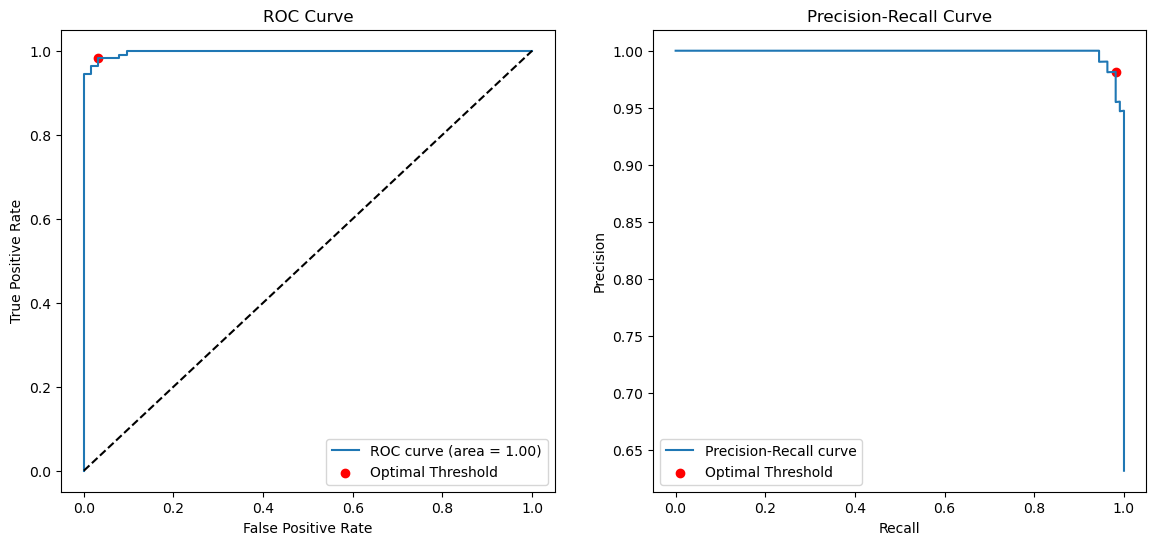

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score

# Caricare il dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestrare il modello di classificazione
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Calcolare le probabilità di previsione
y_probs = model.predict_proba(X_test)[:, 1]

# Calcolare la curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Calcolare la soglia ottimale (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Soglia ottimale (Youden): {optimal_threshold}')

# Calcolare la curva Precision-Recall
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)

# Calcolare la soglia ottimale (F1-Score)
f1_scores = 2*recall*precision / (recall + precision)
optimal_idx_pr = np.argmax(f1_scores)
optimal_threshold_pr = pr_thresholds[optimal_idx_pr]

print(f'Soglia ottimale (F1-Score): {optimal_threshold_pr}')

# Plot delle curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='r', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.scatter(recall[optimal_idx_pr], precision[optimal_idx_pr], marker='o', color='r', label='Optimal Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

plt.show()

### 1. Curva ROC e AUC

La curva ROC (Receiver Operating Characteristic) e l'AUC (Area Under the Curve) sono strumenti utili per valutare le prestazioni del modello e scegliere il CCP ottimale.

- **Curva ROC:** Traccia il tasso di veri positivi (True Positive Rate, TPR) contro il tasso di falsi positivi (False Positive Rate, FPR) a diversi CCP.
- **AUC:** L'area sotto la curva ROC, che misura la capacità del modello di distinguere tra le classi. Un AUC vicino a 1 indica un buon modello.

### 2. Precision-Recall Curve

La Precision-Recall Curve è particolarmente utile quando si lavora con dati sbilanciati.

- **Precision:** Numero di veri positivi diviso per il numero totale di risultati positivi previsti.
- **Recall:** Numero di veri positivi diviso per il numero totale di veri positivi effettivi.

### 3. Matrice di Confusione

Valutare la matrice di confusione per diversi CCP per capire come cambiano i veri positivi, veri negativi, falsi positivi e falsi negativi.

### 4. Cross-Validation

Utilizzare la cross-validation per testare diversi CCP su sottoinsiemi del dataset, garantendo una scelta più robusta.

### 5. Metodi di Ottimizzazione

Utilizzare metodi di ottimizzazione come la ricerca grid (Grid Search) o la ricerca randomica (Random Search) per trovare il CCP ottimale.